# WDL | Stage 4 - EDA

### - Attracting Population to Green Spaces in Metropolitan Areas

In [1]:
import pandas as pd
import numpy as np
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
green_df = pd.read_csv('./data/WDL_Green_Areas_Dataset_V1.csv', sep='|', encoding='latin-1')

In [4]:
green_df

Green_Zone_name  \
0     ESPAÇO JOGO E RECREIO HOMEM DO LEME   
1     ESPAÇO JOGO E RECREIO HOMEM DO LEME   
2            JARDIM AFONSO DE ALBUQUERQUE   
3            JARDIM AFONSO DE ALBUQUERQUE   
4     JARDIM ALAMEDA CIDADE UNIVERSITÁRIA   
5     JARDIM ALAMEDA CIDADE UNIVERSITÁRIA   
6     JARDIM ALAMEDA DOM AFONSO HENRIQUES   
7     JARDIM ALAMEDA DOM AFONSO HENRIQUES   
8                 JARDIM AMÁLIA RODRIGUES   
9                 JARDIM AMÁLIA RODRIGUES   
10              JARDIM AMÉLIA CARVALHEIRA   
11              JARDIM AMÉLIA CARVALHEIRA   
12                   JARDIM ANTÓNIO NOBRE   
13                   JARDIM ANTÓNIO NOBRE   
14                  JARDIM AVELAR BROTERO   
15                  JARDIM AVELAR BROTERO   
16                   JARDIM BASÍLIO TELES   
17                   JARDIM BASÍLIO TELES   
18                   JARDIM BENTO MARTINS   
19                   JARDIM BENTO MARTINS   
20                 JARDIM BOTÂNICO LISBOA   
21                 JARDIM BOTÂNICO LISBOA   
22                  JARDIM BOTÂNICO PORTO   
23                  JARDIM BOTÂNICO PORTO   
24                JARDIM BRAAMCAMP FREIRE   
25                JARDIM BRAAMCAMP FREIRE   
26                     JARDIM CONSTANTINO   
27                     JARDIM CONSTANTINO   
28                     JARDIM DA BOAVISTA   
29                     JARDIM DA BOAVISTA   
30                    JARDIM DA CORUJEIRA   
31                    JARDIM DA CORUJEIRA   
32                          JARDIM DA LUZ   
33                          JARDIM DA LUZ   
34             JARDIM DA RIBEIRA DAS NAUS   
35             JARDIM DA RIBEIRA DAS NAUS   
36                   JARDIM DAS AMOREIRAS   
37                   JARDIM DAS AMOREIRAS   
38                      JARDIM DE BUCELAS   
39                      JARDIM DE BUCELAS   
40            JARDIM DE LOPES DE MENDONÇA   
41            JARDIM DE LOPES DE MENDONÇA   
42                       JARDIM DE SANTOS   
43                       JARDIM DE SANTOS   
44                JARDIM DE TEÓFILO BRAGA   
45                JARDIM DE TEÓFILO BRAGA   
46                 JARDIM DO ARCO DO CEGO   
47                 JARDIM DO ARCO DO CEGO   
48                 JARDIM DO CAMPO GRANDE   
49                 JARDIM DO CAMPO GRANDE   
50                JARDIM DO CAMPO PEQUENO   
51                JARDIM DO CAMPO PEQUENO   
52             JARDIM DO PALÁCIO DA BOLSA   
53             JARDIM DO PALÁCIO DA BOLSA   
54       JARDIM DO PALÁCIO DE BEAU-SÉJOUR   
55       JARDIM DO PALÁCIO DE BEAU-SÉJOUR   
56           JARDIM DO PALÁCIO DE CRISTAL   
57           JARDIM DO PALÁCIO DE CRISTAL   
58                JARDIM DO PRÍNCIPE REAL   
59                JARDIM DO PRÍNCIPE REAL   
60                      JARDIM DOM LUÍS I   
61                      JARDIM DOM LUÍS I   
62                  JARDIM FERNANDO PESSA   
63                  JARDIM FERNANDO PESSA   
64       JARDIM FRANCISCO CALDEIRA CABRAL   
65       JARDIM FRANCISCO CALDEIRA CABRAL   
66           JARDIM FRANCISCO SÁ CARNEIRO   
67           JARDIM FRANCISCO SÁ CARNEIRO   
68    JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN   
69    JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN   
70                    JARDIM GARCIA DORTA   
71                    JARDIM GARCIA DORTA   
72                      JARDIM IRMÃ LÚCIA   
73                      JARDIM IRMÃ LÚCIA   
74         JARDIM JOÃO FREDERICO LUDOVICE   
75         JARDIM JOÃO FREDERICO LUDOVICE   
76                   JARDIM LISBOA ANTIGA   
77                   JARDIM LISBOA ANTIGA   
78                   JARDIM NOVE DE ABRIL   
79                   JARDIM NOVE DE ABRIL   
80                   JARDIM PAULO VALLADA   
81                   JARDIM PAULO VALLADA   
82      JARDIM PROF. ANTÓNIO SOUSA FRANCO   
83      JARDIM PROF. ANTÓNIO SOUSA FRANCO   
84      JRD. CP. VINTE E QUATRO DE AGOSTO   
85      JRD. CP. VINTE E QUATRO DE AGOSTO   
86                        MATA DE BENFICA   
87                        MATA DE BENFICA   
88             PARQUE

In [5]:
#Creating a new column with the daily average of non-residents in influence area and ordering the df 

rule = pd.Series(green_df[green_df['Resident'] == 1]['Daily average of people in influence area'].values, index = green_df['Green_Zone_name'].unique()).to_dict()

green_df['Daily average of people in influence area (Non-Residents)'] = green_df['Green_Zone_name'].map(rule)

green_df = green_df.drop(green_df[green_df.Resident == 1].index).reset_index()

green_df = green_df.drop('Resident', axis = 1)

green_df = green_df[['Green_Zone_name', 'Number of Museums in influence area', 
                     'Number of parking lots in influence area', 'Number of tourist attractions in influence area', 
                     'Green Zones Daily Average Demand', 'Daily average of people in influence area', 
                     'Daily average of people in influence area (Non-Residents)', 'Number of buildings in influence area', 
                     'Number of families in influence area','Number of people resident in influence area', 
                     'perc_senior_pop', 'perc_pop_until_19_yo', 'POINT_X', 'POINT_Y']]

green_df

Green_Zone_name  Number of Museums in influence area  \
0    ESPAÇO JOGO E RECREIO HOMEM DO LEME                                    5   
1           JARDIM AFONSO DE ALBUQUERQUE                                   93   
2    JARDIM ALAMEDA CIDADE UNIVERSITÁRIA                                    8   
3    JARDIM ALAMEDA DOM AFONSO HENRIQUES                                  105   
4                JARDIM AMÁLIA RODRIGUES                                    8   
5              JARDIM AMÉLIA CARVALHEIRA                                  104   
6                   JARDIM ANTÓNIO NOBRE                                   93   
7                  JARDIM AVELAR BROTERO                                   10   
8                   JARDIM BASÍLIO TELES                                   38   
9                   JARDIM BENTO MARTINS                                    5   
10                JARDIM BOTÂNICO LISBOA                                  105   
11                 JARDIM BOTÂNICO PORTO                                   25   
12               JARDIM BRAAMCAMP FREIRE                                   99   
13                    JARDIM CONSTANTINO                                  105   
14                    JARDIM DA BOAVISTA                                   19   
15                   JARDIM DA CORUJEIRA                                    5   
16                         JARDIM DA LUZ                                    0   
17            JARDIM DA RIBEIRA DAS NAUS                                   72   
18                  JARDIM DAS AMOREIRAS                                   13   
19                     JARDIM DE BUCELAS                                    0   
20           JARDIM DE LOPES DE MENDONÇA                                   97   
21                      JARDIM DE SANTOS                                   77   
22               JARDIM DE TEÓFILO BRAGA                                   16   
23                JARDIM DO ARCO DO CEGO                                   91   
24                JARDIM DO CAMPO GRANDE                                  107   
25               JARDIM DO CAMPO PEQUENO                                  104   
26            JARDIM DO PALÁCIO DA BOLSA                                   21   
27      JARDIM DO PALÁCIO DE BEAU-SÉJOUR                                    1   
28          JARDIM DO PALÁCIO DE CRISTAL                                   21   
29               JARDIM DO PRÍNCIPE REAL                                   73   
30                     JARDIM DOM LUÍS I                                  101   
31                 JARDIM FERNANDO PESSA                                   82   
32      JARDIM FRANCISCO CALDEIRA CABRAL                                    2   
33          JARDIM FRANCISCO SÁ CARNEIRO                                    2   
34   JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN                                   92   
35                   JARDIM GARCIA DORTA                                    3   
36                     JARDIM IRMÃ LÚCIA                                   14   
37        JARDIM JOÃO FREDERICO LUDOVICE                                    1   
38                  JARDIM LISBOA ANTIGA                                   73   
39                  JARDIM NOVE DE ABRIL                                  106   
40                  JARDIM PAULO VALLADA                                    0   
41     JARDIM PROF. ANTÓNIO SOUSA FRANCO                                   90   
42     JRD. CP. VINTE E QUATRO DE AGOSTO                                    0   
43                       MATA DE BENFICA                                    0   
44            PARQUE DA CIDADE DE LOURES                                    1   
45                   PARQUE DE SÃO ROQUE                                    3   
46                      PARQUE DOS ANJOS                                   46   
47                    PARQUE EDUARDO VII                                  107   
48       PARQUE INFANTIL CONDE DE BONFIM                

In [6]:
#Checking the longitudes to split the data between Lisboa and Porto areas

np.sort(green_df.POINT_Y.unique())

array([38.69674, 38.6996 , 38.70389, 38.70463, 38.70596, 38.7069 ,
       38.70705, 38.71166, 38.71502, 38.71662, 38.71742, 38.72178,
       38.72313, 38.72835, 38.72961, 38.73036, 38.73062, 38.7312 ,
       38.73467, 38.73638, 38.73755, 38.73757, 38.73805, 38.73919,
       38.73925, 38.73955, 38.7398 , 38.74128, 38.74231, 38.74308,
       38.74359, 38.74581, 38.74607, 38.74694, 38.74836, 38.74978,
       38.75181, 38.75294, 38.75482, 38.75755, 38.76014, 38.76021,
       38.76039, 38.76933, 38.76993, 38.77121, 38.78463, 38.79484,
       38.79877, 38.82598, 38.90102, 41.14118, 41.14839, 41.14934,
       41.15261, 41.15402, 41.15438, 41.15769, 41.15806, 41.15984,
       41.16001, 41.16273, 41.17106, 41.18237])

In [7]:
#Adding a column to the df with the city information

green_df['city'] = green_df['POINT_Y'].apply(lambda x: 'Porto' if x > 38.90102 else 'Lisboa')

In [8]:
geo_df = gpd.GeoDataFrame(
    green_df, geometry = gpd.points_from_xy(green_df.POINT_X, green_df.POINT_Y))

geo_df.crs = "EPSG:4326"
geo_df = geo_df.to_crs(epsg=3857)

In [9]:
geo_df.head()

Green_Zone_name  Number of Museums in influence area  \
0  ESPAÇO JOGO E RECREIO HOMEM DO LEME                                    5   
1         JARDIM AFONSO DE ALBUQUERQUE                                   93   
2  JARDIM ALAMEDA CIDADE UNIVERSITÁRIA                                    8   
3  JARDIM ALAMEDA DOM AFONSO HENRIQUES                                  105   
4              JARDIM AMÁLIA RODRIGUES                                    8   

   Number of parking lots in influence area  \
0                                        28   
1                                       129   
2                                        23   
3                                       175   
4                                         8   

   Number of tourist attractions in influence area  \
0                                               30   
1                                               78   
2                                                4   
3                                               84   
4                                                4   

   Green Zones Daily Average Demand  \
0                          3.728677   
1                         10.259113   
2                         47.347816   
3                         41.485945   
4                          5.768512   

   Daily average of people in influence area  \
0                               45787.629298   
1                               42877.741202   
2                               42877.741202   
3                                6008.626849   
4                               32809.647241   

   Daily average of people in influence area (Non-Residents)  \
0                                       17780.803014           
1                                       17497.825376           
2                                       17497.825376           
3                                       17235.051457           
4                                        7104.740926           

   Number of buildings in influence area  \
0                                   4783   
1                                   1775   
2                                   1775   
3                                   5028   
4                                   2472   

   Number of families in influence area  \
0                                 15352   
1                                 17185   
2                                 17185   
3                                 10598   
4                                  6729   

   Number of people resident in influence area  perc_senior_pop  \
0                                        38012         0.195123   
1                                        41163         0.161747   
2                                        41163         0.161747   
3                                        27362         0.161501   
4                                        15460         0.240815   

   perc_pop_until_19_yo  POINT_X   POINT_Y    city  \
0              0.196017 -8.68415  41.16001   Porto   
1              0.204917 -9.19949  38.69674  Lisboa   
2              0.204917 -9.15757  38.75294  Lisboa   
3              0.209341 -9.13207  38.73757  Lisboa   
4              0.163131 -9.15459  38.73062  Lisboa   

                           geometry  
0   POINT (-966715.156 5035971.828)  
1  POINT (-1024082.542 4678324.805)  
2  POINT (-1019416.029 4686343.881)  
3  POINT (-1016577.382 4684150.137)  
4  POINT (-1019084.297 4683158.326)

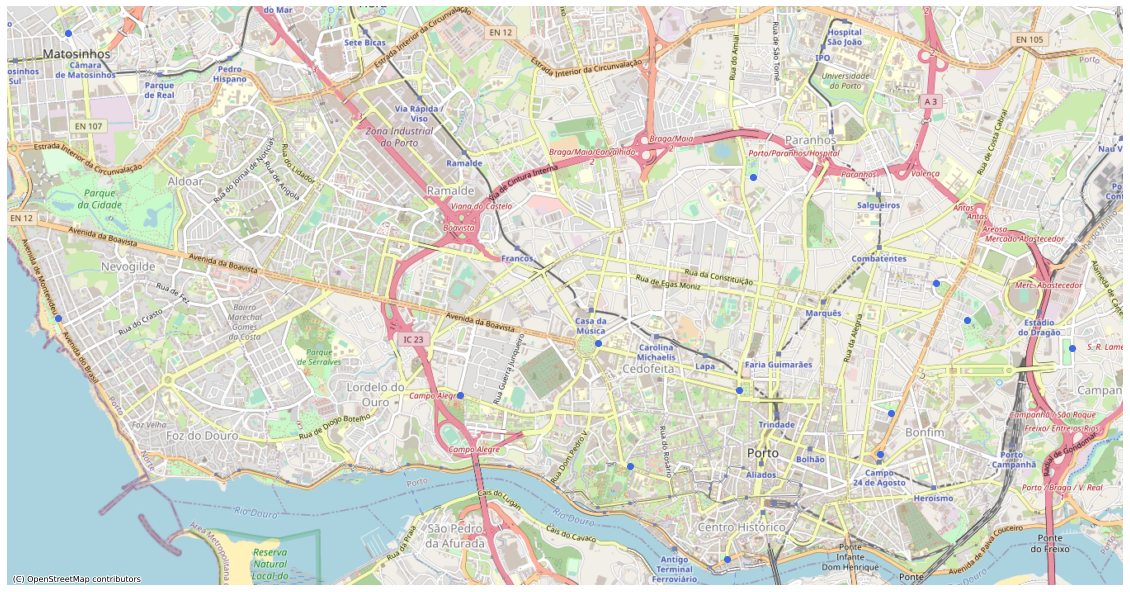

In [10]:
#Plotting the green spaces for Porto

ax = geo_df[geo_df.city == 'Porto']['geometry'].plot(figsize=(20, 20), color = 'royalblue', alpha = 1)

ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

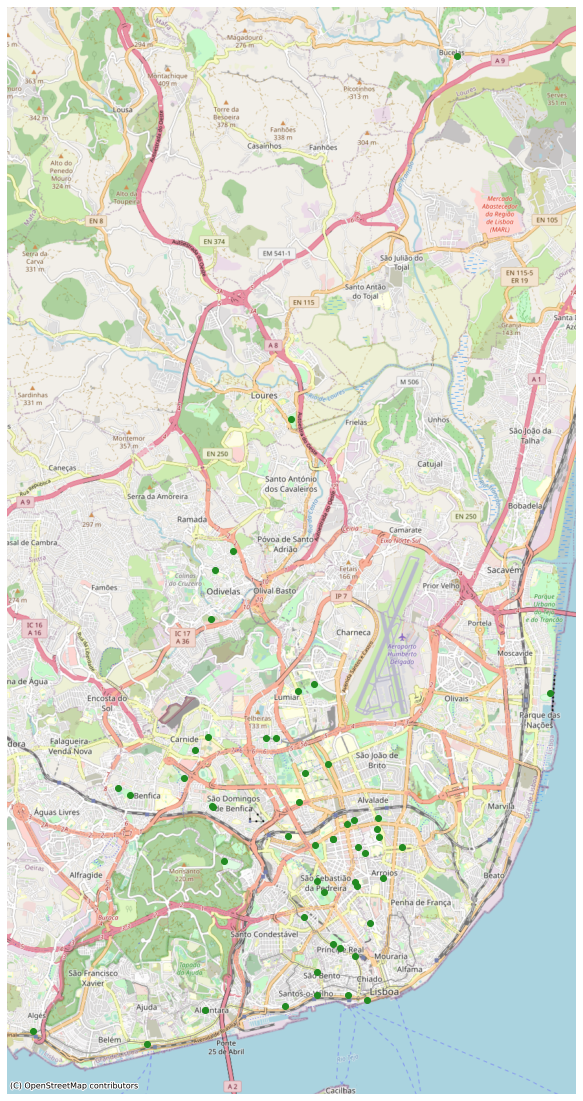

In [11]:
#Plotting the green spaces for Lisboa

ax = geo_df[geo_df.city == 'Lisboa']['geometry'].plot(figsize=(20, 20), color = 'forestgreen', alpha = 1)

ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

In [12]:

plt.bar(x=["Lisboa", "Porto"], 
        height=[green_df[green_df.city == 'Lisboa']['Green_Zone_name'].nunique(), green_df[green_df.city == 'Porto']['Green_Zone_name'].nunique()],
        color = ['forestgreen', 'royalblue'])

plt.title('Green spaces in Lisboa and Porto')
plt.show()

In [13]:
df_lisboa = green_df[green_df['city'] == 'Lisboa']

df_lisboa

Green_Zone_name  Number of Museums in influence area  \
1           JARDIM AFONSO DE ALBUQUERQUE                                   93   
2    JARDIM ALAMEDA CIDADE UNIVERSITÁRIA                                    8   
3    JARDIM ALAMEDA DOM AFONSO HENRIQUES                                  105   
4                JARDIM AMÁLIA RODRIGUES                                    8   
5              JARDIM AMÉLIA CARVALHEIRA                                  104   
6                   JARDIM ANTÓNIO NOBRE                                   93   
7                  JARDIM AVELAR BROTERO                                   10   
9                   JARDIM BENTO MARTINS                                    5   
10                JARDIM BOTÂNICO LISBOA                                  105   
12               JARDIM BRAAMCAMP FREIRE                                   99   
13                    JARDIM CONSTANTINO                                  105   
16                         JARDIM DA LUZ                                    0   
17            JARDIM DA RIBEIRA DAS NAUS                                   72   
18                  JARDIM DAS AMOREIRAS                                   13   
19                     JARDIM DE BUCELAS                                    0   
20           JARDIM DE LOPES DE MENDONÇA                                   97   
21                      JARDIM DE SANTOS                                   77   
23                JARDIM DO ARCO DO CEGO                                   91   
24                JARDIM DO CAMPO GRANDE                                  107   
25               JARDIM DO CAMPO PEQUENO                                  104   
27      JARDIM DO PALÁCIO DE BEAU-SÉJOUR                                    1   
29               JARDIM DO PRÍNCIPE REAL                                   73   
30                     JARDIM DOM LUÍS I                                  101   
31                 JARDIM FERNANDO PESSA                                   82   
32      JARDIM FRANCISCO CALDEIRA CABRAL                                    2   
34   JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN                                   92   
35                   JARDIM GARCIA DORTA                                    3   
36                     JARDIM IRMÃ LÚCIA                                   14   
37        JARDIM JOÃO FREDERICO LUDOVICE                                    1   
38                  JARDIM LISBOA ANTIGA                                   73   
39                  JARDIM NOVE DE ABRIL                                  106   
41     JARDIM PROF. ANTÓNIO SOUSA FRANCO                                   90   
43                       MATA DE BENFICA                                    0   
44            PARQUE DA CIDADE DE LOURES                                    1   
46                      PARQUE DOS ANJOS                                   46   
47                    PARQUE EDUARDO VII                                  107   
48       PARQUE INFANTIL CONDE DE BONFIM                                    1   
49                PARQUE INFANTIL DO IPO                                   28   
50      PARQUE INFANTIL PRAÇA DE LONDRES                                   12   
51                   PARQUE JOSÉ FONTANA                                  107   
52    PARQUE RECREATIVO ALTO DA SERAFINA                                   55   
53     PARQUE URBANO DA QUINTA DA GRANJA                                    4   
54          PARQUE URBANO DA QUINTA NOVA                                    0   
55           PARQUE URBANO DO CASTELINHO                                    0   
56              PARQUE URBANO DO SILVADO                                    1   
57    PQ. INFA. JARD. MARQUÊS DE MARIALA                                   36   
58      PQ. INFA. JARDIM GOMES DE AMORIM                                   90   
59     PQ. INFANTIL AV. MARQUÊS DE TOMAR                                  111   
60  PQ. INFANTIL HOSPITAL DE SANTA MARIA                

In [14]:
y = df_lisboa[['Green Zones Daily Average Demand']]

X = df_lisboa.loc[:, df_lisboa.columns != 'Green Zones Daily Average Demand'].iloc[:, 1:-4]

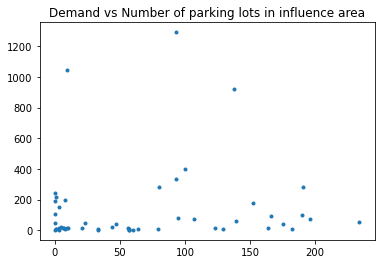

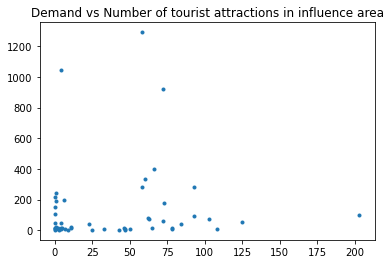

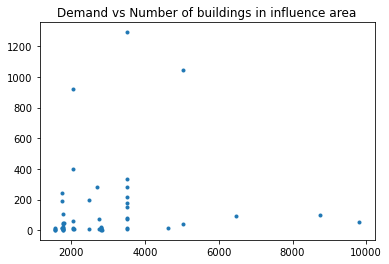

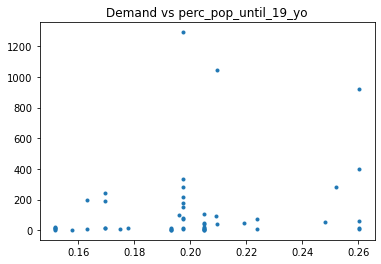

In [15]:

for i in range(len(X.columns)):
    plt.plot(X.iloc[:,i].values, y.iloc[:,0].values, '.')
    plt.title(f"Demand vs {X.columns[i]}")
    plt.show()